### APPENDIX - CODE

In [23]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [24]:
# Step 1: Load Data
df = pd.read_csv('Data.csv')

# Step 2: Preprocessing
df = df.dropna(subset=['u', 'g', 'r', 'i', 'z', 'class'])

# Create color features
df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

# Features and Labels
features = ['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z']
X = df[features]
y = df['class']

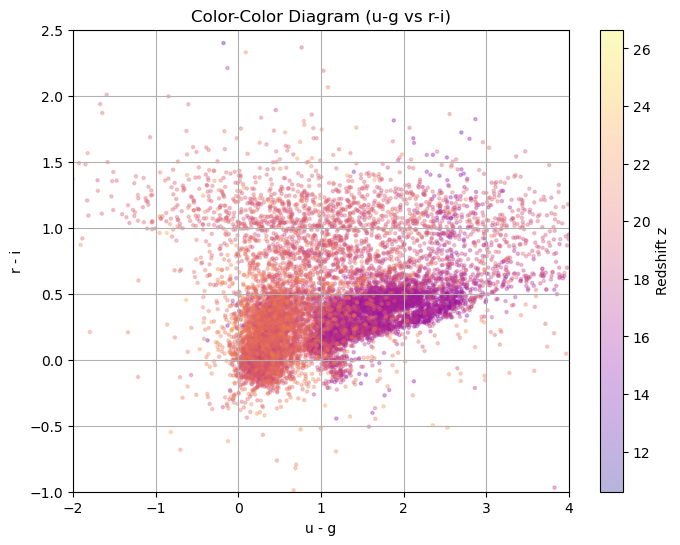

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df['u-g'], df['r-i'], c=df['z'], cmap='plasma', s=5, alpha=0.3)
plt.xlabel('u - g')
plt.ylabel('r - i')
plt.xlim(-2,4)
plt.ylim(-1,2.5)
plt.title('Color-Color Diagram (u-g vs r-i)')
plt.colorbar(label='Redshift z')
plt.grid(True)
plt.show()

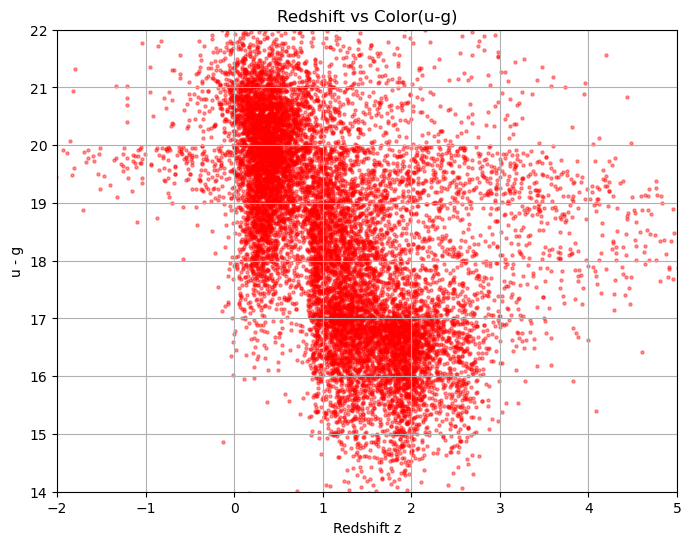

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(df['u-g'], df['z'], alpha=0.4,color='red', s=5)
plt.xlabel('Redshift z')
plt.ylabel('u - g')
plt.ylim(14,22)
plt.xlim(-2,5)
plt.title('Redshift vs Color(u-g)')
plt.grid(True)
plt.show()


## Classification (QSO vs Star vs Galaxy)

In [27]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for SVM, KNN, Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize Classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Step 4: Train and Evaluate Classifiers
results = []

#fig, ax = plt.subplots(5, 1, figsize=(12, 5))

for name, clf in classifiers.items():
    if name in ["SVM", "KNN", "Logistic Regression"]:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Classifier': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })


# Step 5: Compare Results
results_df = pd.DataFrame(results)
print(results_df)

            Classifier  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.902692   0.902624  0.902692  0.902634
1                  SVM  0.895385   0.895671  0.895385  0.895379
2                  KNN  0.896923   0.897053  0.896923  0.896824
3  Logistic Regression  0.815000   0.815573  0.815000  0.815142
4    Gradient Boosting  0.890769   0.890885  0.890769  0.890775


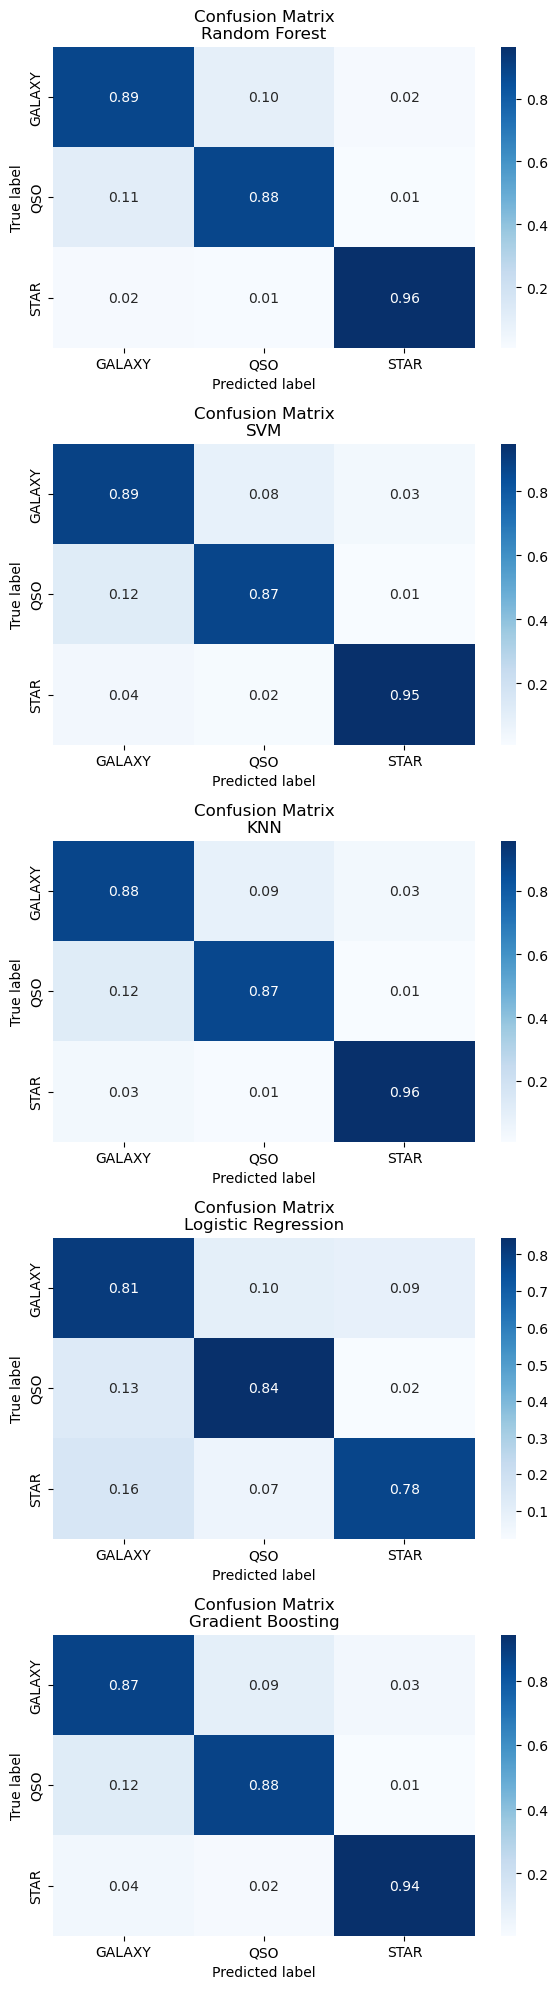

In [28]:
# Specify the two models you want to compare
model_names = ['Random Forest', 'SVM','KNN','Logistic Regression','Gradient Boosting']  # change these to the exact keys you used

# True labels
labels = np.unique(y_test)  # e.g. ['GALAXY','QSO']

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(6, 20))

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for ax, name in zip(axes, model_names):
    model = classifiers[name]
    
    # Choose the correct feature set for each model
    if name in ["SVM", "KNN", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels,normalize='true')
    
    # Plot
    sns.heatmap(
        cm,
        annot=True,
        fmt='.2f',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
        ax=ax
    )
    ax.set_title(f'Confusion Matrix\n{name}')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


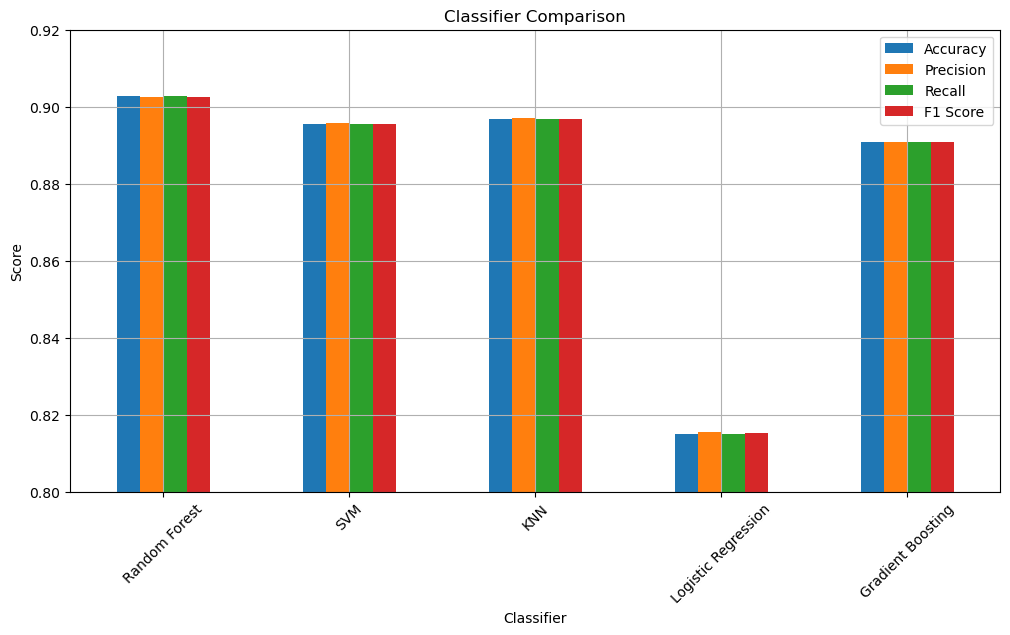

In [29]:
# Step 6: Optional: Visualize
results_df.set_index('Classifier')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12,6))
plt.title('Classifier Comparison')
plt.ylabel('Score')
plt.ylim(0,1)
plt.ylim(0.8,0.92)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Regression (Given spectral data predicting the redshift)

In [30]:
# Imports
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Preprocessing (already done)
# Assuming df has features: u, g, r, i, z, u-g, g-r, r-i, i-z
# and target: redshift

X = df[['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z']]
y = df['redshift']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Regressors
regressors = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Step 3: Train, Predict and Evaluate
results = []

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Regressor': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Step 4: Compare Results
results_df = pd.DataFrame(results)
print(results_df)


                  Regressor      RMSE       MAE  R2 Score
0             Random Forest  0.124821  0.065574  0.865289
1         Gradient Boosting  0.131422  0.082329  0.850664
2         Linear Regression  0.208280  0.158639  0.624919
3  Support Vector Regressor  0.187481  0.131786  0.696089
4       K-Nearest Neighbors  0.131909  0.069795  0.849555
5             Decision Tree  0.173111  0.086549  0.740891


Text(0.5, 1.0, 'Predicted vs Test $z$ with single feature $u-g$')

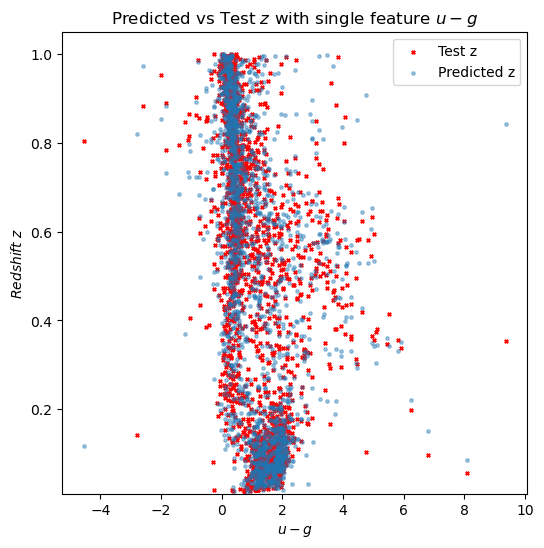

In [31]:
x=X_test[['u-g']]
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(x,y_test,s=6,label='Test z',alpha=1,color='red',marker='x')
plt.scatter(x,y_pred,s=6,label='Predicted z',alpha=0.4,marker='o')
plt.xlabel('$u-g$')
plt.ylabel('$Redshift$ $z$')
plt.ylim(0.01)
plt.legend()
plt.title('Predicted vs Test $z$ with single feature $u-g$')

Text(0.5, 1.0, 'Predicted vs Test $z$ with single feature $g-r$')

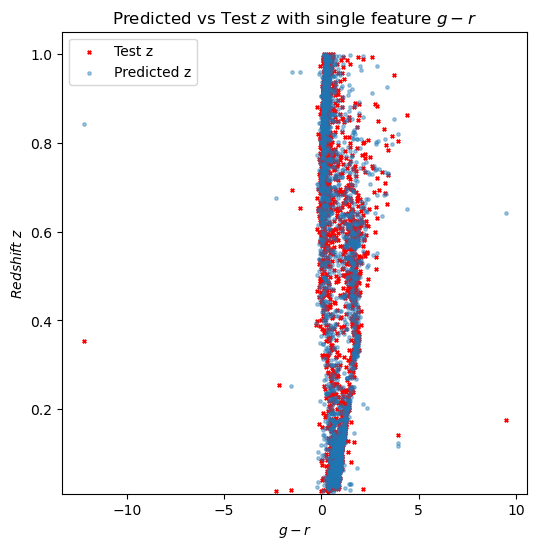

In [32]:

x=X_test[['g-r']]
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(x,y_test,s=6,label='Test z',alpha=1,color='red',marker='x')
plt.scatter(x,y_pred,s=6,label='Predicted z',alpha=0.4,marker='o')
plt.xlabel('$g-r$')
plt.ylabel('$Redshift$ $z$')
plt.ylim(0.01)
plt.legend()
plt.title('Predicted vs Test $z$ with single feature $g-r$')

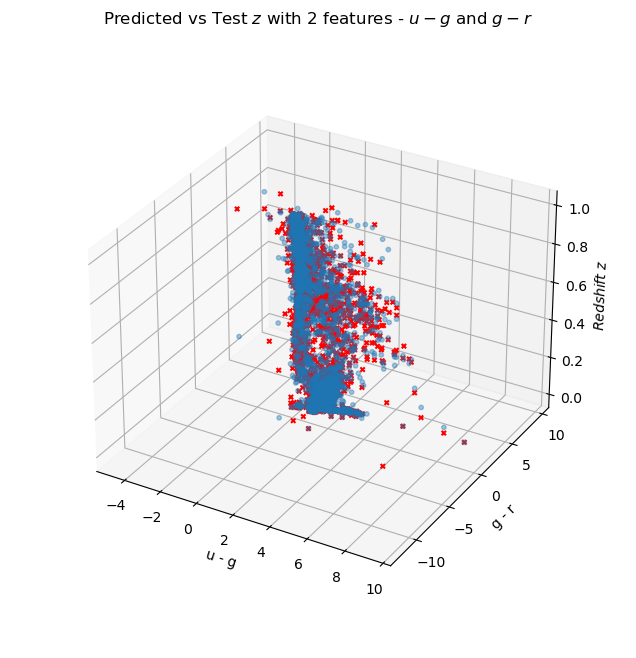

In [33]:
x1=X_test[['u-g']]
x2=X_test[['g-r']]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y_test, s=10, alpha=1,color='red',marker='x')
ax.scatter(x1, x2, y_pred, s=10, alpha=0.4,marker='o')


# Labels and title
ax.set_xlabel('u - g')
ax.set_ylabel('g - r')
ax.set_zlabel('$Redshift$ $z$')
ax.set_title('Predicted vs Test $z$ with 2 features - $u-g$ and $g-r$')
ax.set_box_aspect(None, zoom=0.85)
#plt.tight_layout()
plt.show()

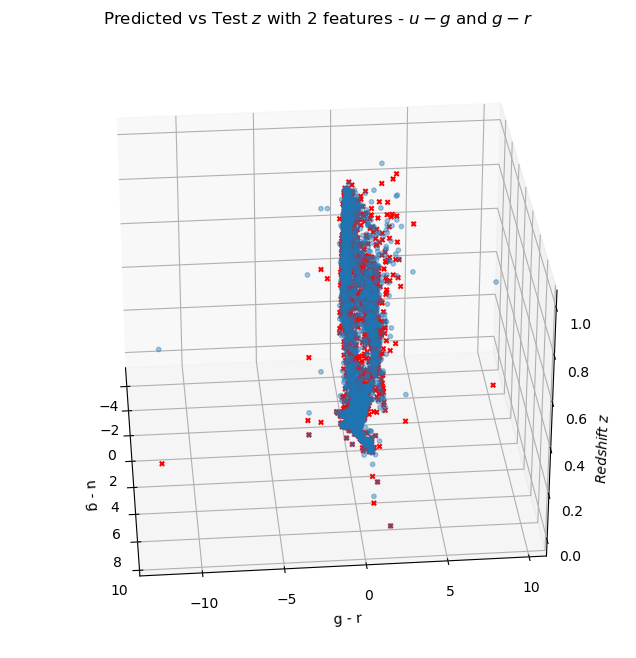

In [49]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import pandas as pd
# from PIL import Image

# # Create figure and 3D axes
# x1=X_test[['u-g']]
# x2=X_test[['g-r']]

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x1, x2, y_test, s=10, alpha=1,color='red',marker='x')
# ax.scatter(x1, x2, y_pred, s=10, alpha=0.4,marker='o')


# # Labels and title
# ax.set_xlabel('u - g')
# ax.set_ylabel('g - r')
# ax.set_zlabel('$Redshift$ $z$')
# ax.set_title('Predicted vs Test $z$ with 2 features - $u-g$ and $g-r$')

# # Generate frames for each angle
# frames = []
# for angle in range(0, 360, 5):
#     ax.view_init(elev=30, azim=angle)
#     fig.canvas.draw()
#     img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#     w, h = fig.canvas.get_width_height()
#     img_data = img_data.reshape(h, w, 3)
#     frames.append(Image.fromarray(img_data))

# #Save frames as an animated GIF
# gif_path = '3d_scatter_rotate.gif'
# frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

# #plt.close(fig)


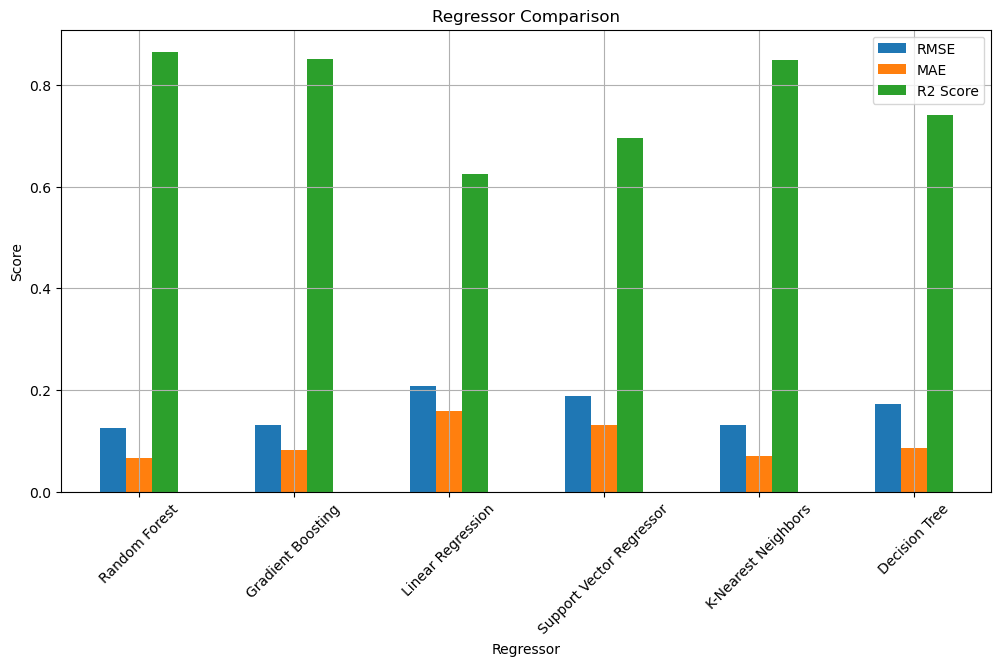

In [35]:
# Step 5: Optional Visualization
results_df.set_index('Regressor')[['RMSE', 'MAE', 'R2 Score']].plot(kind='bar', figsize=(12,6))
plt.title('Regressor Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Clustering

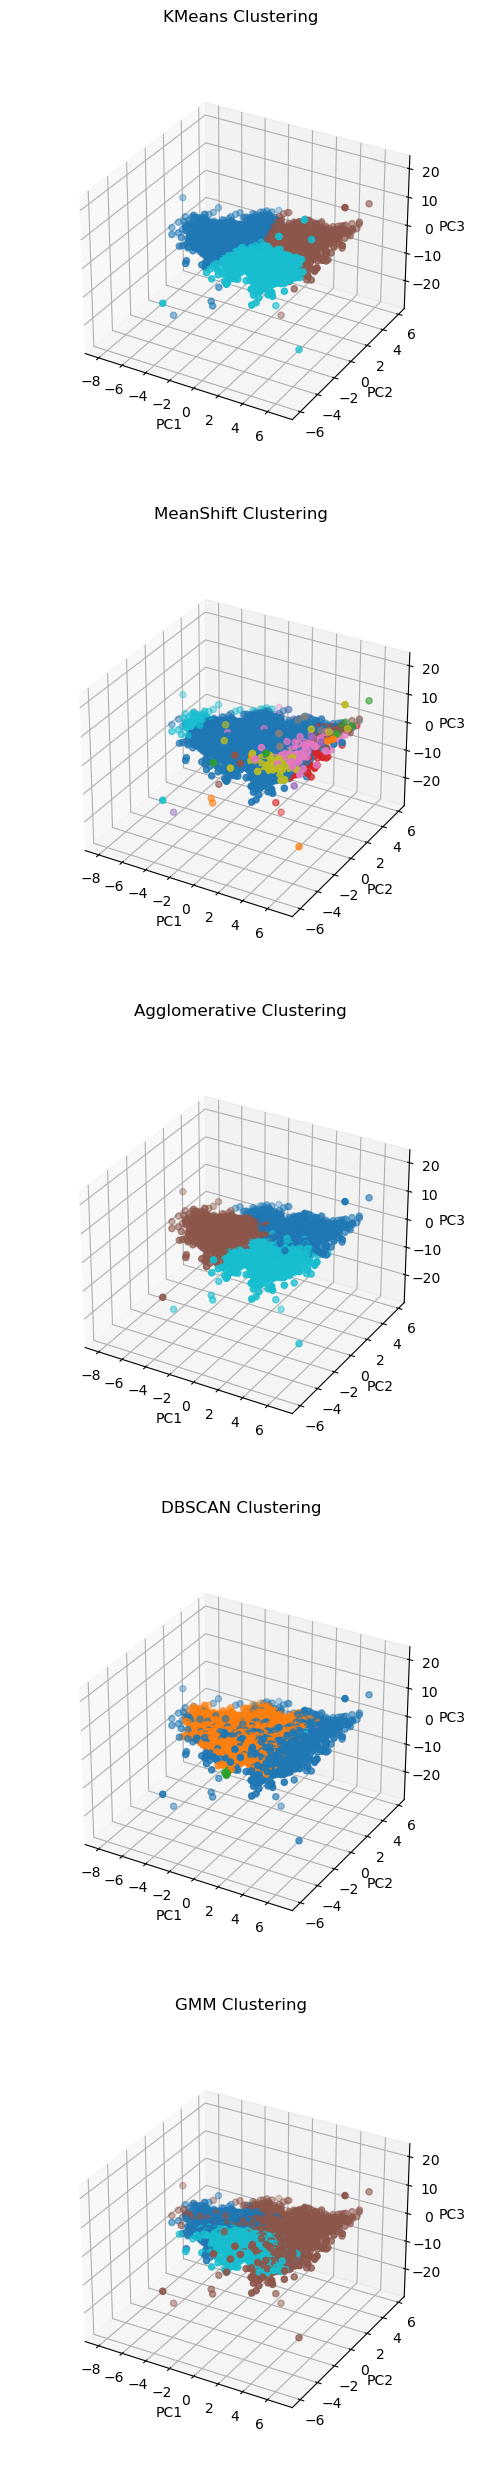

In [45]:
# Imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pandas as pd

# Step 1: Standardize Features
X = df[['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Reduce to 3D with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Initialize Clustering Models
cluster_models = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'MeanShift': MeanShift(),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=3, random_state=42)
}

cluster_labels = {}

# Step 4: Fit Models and Assign Labels
for name, model in cluster_models.items():
    if name == 'GMM':
        model.fit(X_scaled)
        labels = model.predict(X_scaled)
    else:
        labels = model.fit_predict(X_scaled)
    cluster_labels[name] = labels

# Step 5: 3D Visualization for Each Model
fig = plt.figure(figsize=(30, 25))

for idx, (name, labels) in enumerate(cluster_labels.items(), start=1):
    ax = fig.add_subplot(5, 1, idx, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=20)
    ax.set_title(f'{name} Clustering', fontsize=12)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_box_aspect(None, zoom=0.80)
plt.tight_layout()
plt.show()


In [37]:
# Step 6: Evaluate Clustering
results = []

for name, labels in cluster_labels.items():
    # Silhouette score only works if > 1 cluster
    if len(np.unique(labels)) > 1:
        sil_score = silhouette_score(X_scaled, labels)
    else:
        sil_score = np.nan

    # Adjusted Rand Index if true labels exist
    if 'class' in df.columns:
        true_labels = df['class'].values
        ari_score = adjusted_rand_score(true_labels, labels)
    else:
        ari_score = np.nan

    results.append({
        'Model': name,
        'Silhouette Score': sil_score,
        'Adjusted Rand Index': ari_score
    })

           Model  Silhouette Score  Adjusted Rand Index
0         KMeans          0.406598             0.293919
1      MeanShift         -0.020525            -0.007614
2  Agglomerative          0.395141             0.258972
3         DBSCAN         -0.177372            -0.011440
4            GMM          0.326114             0.380983


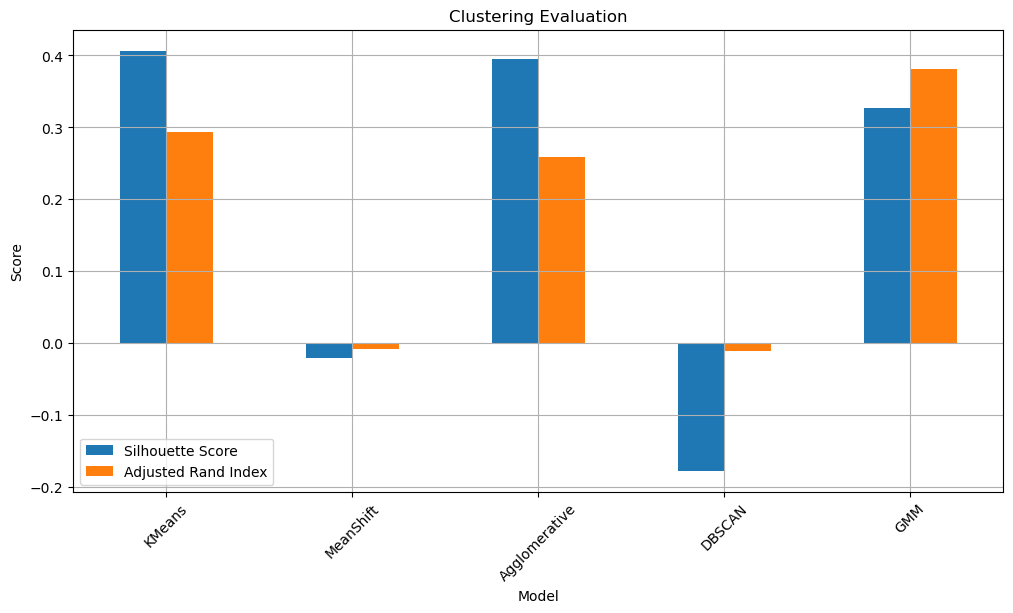

In [38]:
# Step 7: Show Evaluation Results
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Plot Evaluation
results_df.set_index('Model')[['Silhouette Score', 'Adjusted Rand Index']].plot(kind='bar', figsize=(12,6))
plt.title('Clustering Evaluation')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 2-Point Correlation Function

In [39]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

# Step 1: Preprocessing
# Use existing 'ra', 'dec', and 'redshift' columns from df
# Filter galaxies in a redshift bin (optional)
# Preprocessing (as before)
z_min, z_max = 0.1, 0.3
df_filtered = df[(df['redshift'] >= z_min) & (df['redshift'] <= z_max)]
ra = np.deg2rad(df_filtered['ra'].values)
dec = np.deg2rad(df_filtered['dec'].values)
x = np.cos(dec) * np.cos(ra)
y = np.cos(dec) * np.sin(ra)
z = np.sin(dec)
positions = np.vstack((x, y, z)).T

# Build the KDTree for your data
from sklearn.neighbors import KDTree
tree_data = KDTree(positions)

# Define your bin edges and centers
r_bins = np.logspace(-3, 0, 20)      # 20 edges → 19 bins
r_bin_centers = 0.5 * (r_bins[1:] + r_bins[:-1])

# Compute cumulative data–data counts at each bin edge
cum_DD = tree_data.two_point_correlation(positions, r_bins)
# Then get just the counts in each bin:
DD_counts = np.diff(cum_DD)

# Generate a random catalog over the same footprint
n_random = len(positions)
ra_rand = np.random.uniform(df_filtered['ra'].min(), df_filtered['ra'].max(), n_random)
dec_rand = np.random.uniform(df_filtered['dec'].min(), df_filtered['dec'].max(), n_random)
ra_rand, dec_rand = np.deg2rad(ra_rand), np.deg2rad(dec_rand)
x_r, y_r, z_r = np.cos(dec_rand)*np.cos(ra_rand), np.cos(dec_rand)*np.sin(ra_rand), np.sin(dec_rand)
positions_rand = np.vstack((x_r, y_r, z_r)).T

# Random–random counts
tree_rand = KDTree(positions_rand)
cum_RR = tree_rand.two_point_correlation(positions_rand, r_bins)
RR_counts = np.diff(cum_RR)

# Data–random cross counts
cum_DR = tree_data.two_point_correlation(positions_rand, r_bins)
DR_counts = np.diff(cum_DR)

# Landy–Szalay estimator
xi = (DD_counts - 2*DR_counts + RR_counts) / RR_counts



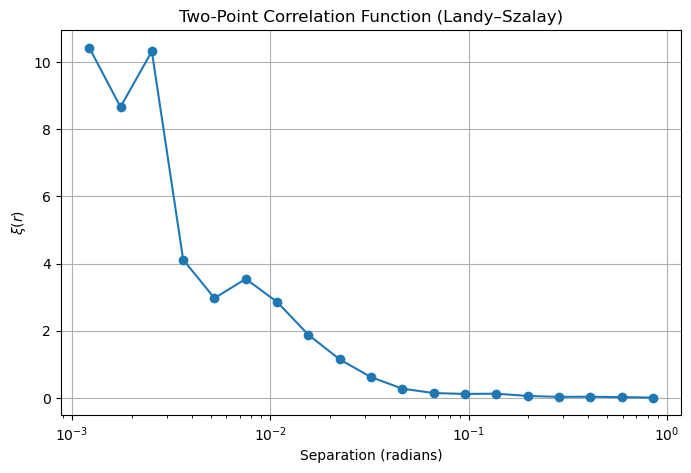

In [40]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(r_bin_centers, xi/30, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Separation (radians)')
plt.ylabel(r'$\xi(r)$')
plt.title('Two-Point Correlation Function (Landy–Szalay)')
plt.grid(True)
plt.show()

## Parametric vs Non-Parametric

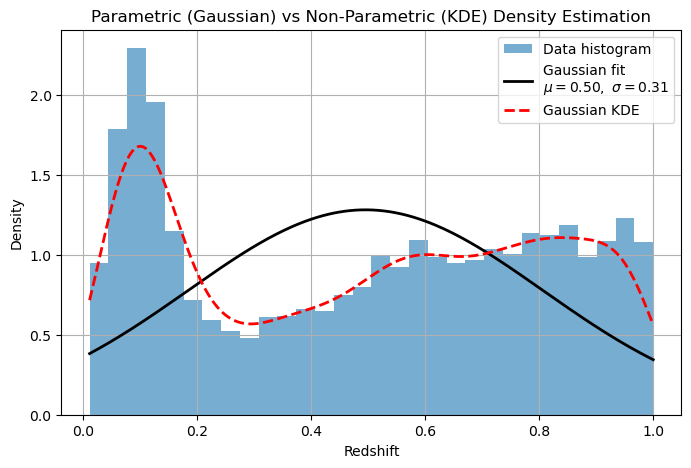

In [41]:
# Imports (if not already imported)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Step 1: Filter out STAR class, keep only GALAXY and QSO
mask = df['class'].isin(['GALAXY', 'QSO'])
# Now pick your 1D variable on that subset (e.g., redshift or a color index)
data = df.loc[mask, 'redshift'].values  # or df.loc[mask, 'g-r'].values, etc.

# Step 2: Parametric Density Estimation (Gaussian fit)
# Fit a Gaussian to the data
mu, std = norm.fit(data)

# Create an array of x-values over the range of the data
x = np.linspace(data.min(), data.max(), 200)

# Compute the Gaussian PDF
pdf = norm.pdf(x, loc=mu, scale=std)

# Plot histogram and Gaussian fit
plt.figure(figsize=(8,5))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Data histogram')
plt.plot(x, pdf, 'k-', lw=2, label=f'Gaussian fit\n$\mu={mu:.2f},\ \sigma={std:.2f}$')

# Step 3: Non-Parametric Density Estimation (KDE)
kde = gaussian_kde(data)
kde_vals = kde(x)

# Overlay KDE curve
plt.plot(x, kde_vals, 'r--', lw=2, label='Gaussian KDE')

# Final touches
plt.xlabel('Redshift')
plt.ylabel('Density')
plt.title('Parametric (Gaussian) vs Non-Parametric (KDE) Density Estimation')
plt.legend()
plt.grid(True)
plt.show()

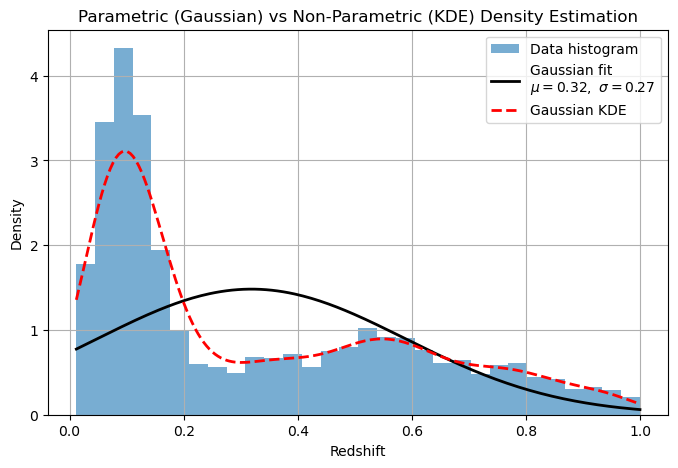

In [42]:
# Imports (if not already imported)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Step 1: Filter out STAR class, keep only GALAXY and QSO
mask = df['class'].isin(['GALAXY'])
# Now pick your 1D variable on that subset (e.g., redshift or a color index)
data = df.loc[mask, 'redshift'].values  # or df.loc[mask, 'g-r'].values, etc.

# Step 2: Parametric Density Estimation (Gaussian fit)
# Fit a Gaussian to the data
mu, std = norm.fit(data)

# Create an array of x-values over the range of the data
x = np.linspace(data.min(), data.max(), 200)

# Compute the Gaussian PDF
pdf = norm.pdf(x, loc=mu, scale=std)

# Plot histogram and Gaussian fit
plt.figure(figsize=(8,5))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Data histogram')
plt.plot(x, pdf, 'k-', lw=2, label=f'Gaussian fit\n$\mu={mu:.2f},\ \sigma={std:.2f}$')

# Step 3: Non-Parametric Density Estimation (KDE)
kde = gaussian_kde(data)
kde_vals = kde(x)

# Overlay KDE curve
plt.plot(x, kde_vals, 'r--', lw=2, label='Gaussian KDE')

# Final touches
plt.xlabel('Redshift')
plt.ylabel('Density')
plt.title('Parametric (Gaussian) vs Non-Parametric (KDE) Density Estimation')
plt.legend()
plt.grid(True)
plt.show()

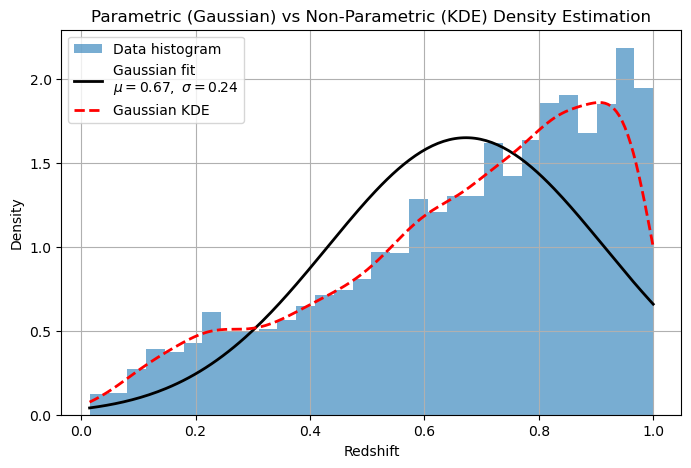

In [43]:
# Imports (if not already imported)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Step 1: Filter out STAR class, keep only GALAXY and QSO
mask = df['class'].isin(['QSO'])
# Now pick your 1D variable on that subset (e.g., redshift or a color index)
data = df.loc[mask, 'redshift'].values  # or df.loc[mask, 'g-r'].values, etc.

# Step 2: Parametric Density Estimation (Gaussian fit)
# Fit a Gaussian to the data
mu, std = norm.fit(data)

# Create an array of x-values over the range of the data
x = np.linspace(data.min(), data.max(), 200)

# Compute the Gaussian PDF
pdf = norm.pdf(x, loc=mu, scale=std)

# Plot histogram and Gaussian fit
plt.figure(figsize=(8,5))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Data histogram')
plt.plot(x, pdf, 'k-', lw=2, label=f'Gaussian fit\n$\mu={mu:.2f},\ \sigma={std:.2f}$')

# Step 3: Non-Parametric Density Estimation (KDE)
kde = gaussian_kde(data)
kde_vals = kde(x)

# Overlay KDE curve
plt.plot(x, kde_vals, 'r--', lw=2, label='Gaussian KDE')

# Final touches
plt.xlabel('Redshift')
plt.ylabel('Density')
plt.title('Parametric (Gaussian) vs Non-Parametric (KDE) Density Estimation')
plt.legend()
plt.grid(True)
plt.show()